In [1]:
import numpy as np
import matplotlib.pyplot as plt
I1 = np.array([5, 11, 14, 18, 21, 24, 26, 25, 22, 18, 20, 29, 32, 35, 39, 41, 42, 41.5, 41, 39, 37.5, 37, 37.5, 38, 40, 42, 46, 51, 54, 57, 58, 59, 60, 61.5, 64, 69, 70, 74])
V1 = np.array([3.35, 6.45, 8.89, 11.54, 14.11, 16.04, 17.85, 19.82, 22.62, 25.20, 26.56, 30.88, 31.90, 33.50, 35.21, 36.42, 37.99, 39.05, 39.50, 41.18, 42.36, 43.73, 45.45, 46.74, 48.47, 50.45, 53.35, 55.69, 57.65, 60.50, 61.68, 64.84, 66.16, 67.82, 70.86, 75.92, 77.11, 79.90])

I2 = np.array([0, 4, 9, 13, 16, 18.5, 20, 23, 24, 24.5, 25, 24.5, 23, 20, 11, 15, 20, 23, 27, 31, 34, 35, 32, 29, 28, 31, 34, 37, 40, 43, 44.5, 45, 46, 49, 51, 51.5, 53])
V2 = np.array([0.4, 4.91, 7.23, 9.97, 11.73, 13.56, 14.97, 17.03, 17.76, 18.17, 18.81, 19.88, 21.00, 22.91, 24.75, 28.18, 30.18, 31.55, 33.16, 34.86, 36.09, 39.00, 41.59, 44.17, 47.87, 51.10, 53.63, 55.56, 57.68, 60.25, 62.7, 65.68, 69.61, 74.91, 77.11, 77.8, 80.05])

I3 = np.array([0, 3.5, 6.5, 11, 13, 16, 20, 22.5, 23, 20, 13, 5, 6, 10, 16, 19, 26, 28, 27, 24, 22, 20, 21, 24, 27, 29.5, 31, 32, 32, 33, 34])
V3 = np.array([0.04, 6.65, 8.09, 10.21, 11.73, 13.72, 16.58, 18.56, 20.48, 22.48, 24.31, 26.60, 27.93, 29.80, 31.90, 33, 36.10, 37.77, 40.88, 43.5, 45.22, 47.67, 51.65, 54.70, 56.84, 59, 61.32, 64.67, 66.28, 75.6, 77.3])

delta_V = []
delta_V_delta = []

In [2]:
def print_fit(params, cov):
    names = ['a', 'b', 'c', 'd']
    names_cov = ['delta a', 'delta b', 'delta c', 'delta d']
    for i in range(len(params)):
        print('%s    %E    %s    %E' %(names[i], params[i], names_cov[i], cov[i]))

Зависимость $I(V)$  при $V_{зад}=4$B

a    -1.591227E-01    delta a    2.340013E-02
b    5.879990E+00    delta b    8.681047E-01
c    -2.919025E+01    delta c    7.707133E+00
V1 = 1.847628E+01  +- 3.850100E+00

a    -2.099917E-01    delta a    2.445416E-02
b    1.622735E+01    delta b    1.851800E+00
c    -2.721398E+02    delta c    3.480935E+01
V2 = 3.863807E+01  +- 6.299756E+00

a    2.346504E-03    delta a    6.560769E-04
b    -4.653038E-01    delta b    1.246493E-01
c    3.140085E+01    delta c    7.829007E+00
d    -6.598361E+02    delta d    1.625212E+02
V3 = 6.609889E+01  +- 2.559477E+01



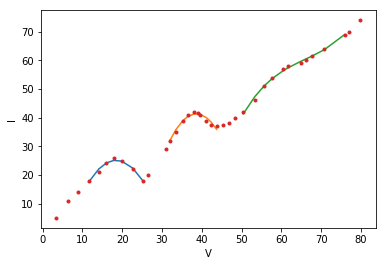

In [3]:
x1 = V1
y1 = I1
# from scipy.optimize import curve_fit
# popt, pcov = curve_fit(f, x, y)
# pcov = list(map(lambda x: np.sqrt(x), np.diag(pcov)))
x = x1[3:10]
y = y1[3:10]
fit = np.polyfit(x, y, 2, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
my_V1 = -params[1]/(2*params[0])
my_V1_delta = my_V1*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V1 = %E  +- %E' %(my_V1, my_V1_delta))
print()
plt.plot(x, params[0]*x**2+params[1]*x+params[2])

x = x1[12:22]
y = y1[12:22]
fit = np.polyfit(x, y, 2, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
my_V2 = -params[1]/(2*params[0])
my_V2_delta = my_V2*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V2 = %E  +- %E' %(my_V2, my_V2_delta))
print()
plt.plot(x, params[0]*x**2+params[1]*x+params[2])

x = x1[25:36]
y = y1[25:36]
fit = np.polyfit(x, y, 3, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
my_V3 = -params[1]/(3*params[0])
my_V3_delta = my_V3*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V3 = %E  +- %E' %(my_V3, my_V3_delta))
print()
plt.plot(x, params[0]*x**3+params[1]*x**2+params[2]*x+params[3])

delta_V.append(my_V2-my_V1)
delta_V.append(my_V3-my_V2)
delta_V_delta.append(my_V1_delta+my_V2_delta)
delta_V_delta.append(my_V3_delta+my_V2_delta)

plt.xlabel('V')
plt.ylabel('I')
plt.plot(x1, y1, '.')
plt.show()

Зависимость $I(V)$  при $V_{зад}=6$B

a    -2.958715E-01    delta a    2.579698E-02
b    1.121976E+01    delta b    9.831636E-01
c    -8.180035E+01    delta c    9.277826E+00
V1 = 1.896053E+01  +- 2.343809E+00

a    -2.282578E-01    delta a    5.822510E-02
b    1.774770E+01    delta b    4.505882E+00
c    -3.101512E+02    delta c    8.642672E+01
V2 = 3.887643E+01  +- 1.399152E+01

a    3.456317E-03    delta a    7.843675E-04
b    -6.966436E-01    delta b    1.511708E-01
c    4.704064E+01    delta c    9.649924E+00
d    -1.018541E+03    delta d    2.040369E+02
V3 = 6.718555E+01  +- 2.109552E+01



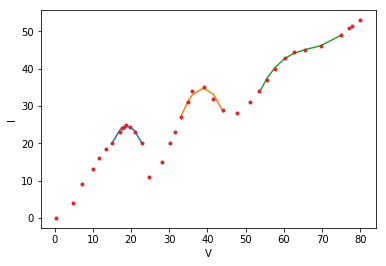

In [4]:
x1 = V2
y1 = I2
# from scipy.optimize import curve_fit
# popt, pcov = curve_fit(f, x, y)
# pcov = list(map(lambda x: np.sqrt(x), np.diag(pcov)))
x = x1[6:14]
y = y1[6:14]
fit = np.polyfit(x, y, 2, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
my_V1 = -params[1]/(2*params[0])
my_V1_delta = my_V1*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V1 = %E  +- %E' %(my_V1, my_V1_delta))
print()
plt.plot(x, params[0]*x**2+params[1]*x+params[2])

x = x1[18:24]
y = y1[18:24]
fit = np.polyfit(x, y, 2, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
my_V2 = -params[1]/(2*params[0])
my_V2_delta = my_V2*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V2 = %E  +- %E' %(my_V2, my_V2_delta))
print()
plt.plot(x, params[0]*x**2+params[1]*x+params[2])

x = x1[26:34]
y = y1[26:34]
fit = np.polyfit(x, y, 3, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
my_V3 = -params[1]/(3*params[0])
my_V3_delta = my_V3*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V3 = %E  +- %E' %(my_V3, my_V3_delta))
print()
plt.plot(x, params[0]*x**3+params[1]*x**2+params[2]*x+params[3])


delta_V.append(my_V2-my_V1)
delta_V.append(my_V3-my_V2)
delta_V_delta.append(my_V1_delta+my_V2_delta)
delta_V_delta.append(my_V3_delta+my_V2_delta)

plt.xlabel('V')
plt.ylabel('I')
plt.plot(x1, y1, '.')
plt.show()

Зависимость $I(V)$  при $V_{зад}=8$B

a    -2.944534E-01    delta a    8.530590E-02
b    1.107244E+01    delta b    3.260558E+00
c    -8.120324E+01    delta c    3.033620E+01
V1 = 1.880168E+01  +- 7.766873E+00

a    -2.055706E-01    delta a    2.214846E-02
b    1.624701E+01    delta b    1.707203E+00
c    -2.930135E+02    delta c    3.248096E+01
V2 = 3.951687E+01  +- 5.947201E+00

a    3.032875E-03    delta a    4.664254E-04
b    -6.251639E-01    delta b    9.093730E-02
c    4.294224E+01    delta c    5.868374E+00
d    -9.508502E+02    delta d    1.253851E+02
V3 = 6.870970E+01  +- 1.454478E+01



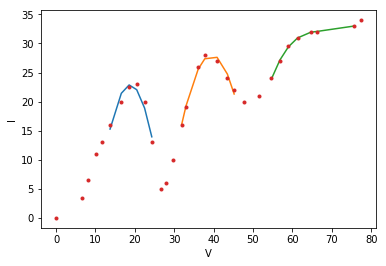

In [5]:
x1 = V3
y1 = I3
# from scipy.optimize import curve_fit
# popt, pcov = curve_fit(f, x, y)
# pcov = list(map(lambda x: np.sqrt(x), np.diag(pcov)))
x = x1[5:11]
y = y1[5:11]
fit = np.polyfit(x, y, 2, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
my_V1 = -params[1]/(2*params[0])
my_V1_delta = my_V1*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V1 = %E  +- %E' %(my_V1, my_V1_delta))
print()
plt.plot(x, params[0]*x**2+params[1]*x+params[2])

x = x1[14:21]
y = y1[14:21]
fit = np.polyfit(x, y, 2, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
my_V2 = -params[1]/(2*params[0])
my_V2_delta = my_V2*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V2 = %E  +- %E' %(my_V2, my_V2_delta))
print()
plt.plot(x, params[0]*x**2+params[1]*x+params[2])

x = x1[23:30]
y = y1[23:30]
fit = np.polyfit(x, y, 3, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print_fit(params, cov)
my_V3 = -params[1]/(3*params[0])
my_V3_delta = my_V3*np.sqrt((cov[0]/params[0])**2 + (cov[1]/params[1])**2)
print('V3 = %E  +- %E' %(my_V3, my_V3_delta))
print()
plt.plot(x, params[0]*x**3+params[1]*x**2+params[2]*x+params[3])

delta_V.append(my_V2-my_V1)
delta_V.append(my_V3-my_V2)
delta_V_delta.append(my_V1_delta+my_V2_delta)
delta_V_delta.append(my_V3_delta+my_V2_delta)

plt.xlabel('V')
plt.ylabel('I')
plt.plot(x1, y1, '.')
plt.show()

Получение значений $\Delta V$ из графиков

In [11]:
for i in range (len(delta_V)):
    print('delta_V =%E +- %E' % (delta_V[i], delta_V_delta[i]))
print('delta_V_avg = %E' % (np.mean(delta_V)))
print('delta_V_delta_avg = %E' % (sum(delta_V_delta)/len(delta_V_delta)))

delta_V =2.016179E+01 +- 1.014986E+01
delta_V =2.746082E+01 +- 3.189452E+01
delta_V =1.991589E+01 +- 1.633533E+01
delta_V =2.830913E+01 +- 3.508704E+01
delta_V =2.071519E+01 +- 1.371407E+01
delta_V =2.919283E+01 +- 2.049199E+01
delta_V_avg = 2.429261E+01
delta_V_delta_avg = 2.127880E+01
